## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

In [1]:
# install and import necessary libraries.

import warnings

warnings.filterwarnings("ignore")
import re, string, unicodedata  # Import Regex, string and unicodedata.
import contractions  # Import contractions library.
from bs4 import BeautifulSoup  # Import BeautifulSoup.

import numpy as np  # Import numpy.
import pandas as pd  # Import pandas.
import random
import nltk  # Import Natural Language Tool-Kit.
import matplotlib.pyplot as plt  # Import plt for visualization
import seaborn as sns

nltk.download("stopwords")  # Download Stopwords.
nltk.download("punkt")
nltk.download("wordnet")

from nltk.corpus import stopwords, wordnet  # Import stopwords and wordnet
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer  # Import Lemmatizer.
from nltk.stem.porter import PorterStemmer  # Used for Stemming of words in the corpus
from collections import Counter  # count the key-value pairs in an object
import wordcloud
from wordcloud import (
    WordCloud,
    STOPWORDS,
    ImageColorGenerator,
)  # Used for plotting the wordcloud of a corpus


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Display full dataframe information (Non-turncated Text column.)
pd.set_option("display.max_colwidth", None)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumarchandraketu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kumarchandraketu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kumarchandraketu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<IPython.core.display.Javascript object>

In [64]:
#  Import data file
docData = pd.read_csv("Tweets.csv")

<IPython.core.display.Javascript object>

In [3]:
docData.shape

(14640, 15)

<IPython.core.display.Javascript object>

* Total records has 14640 rows and 15 columns 

In [4]:
docData.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* airline_sentiment_gold, airline_sentiment_gold  and tweet_coord has more than 90% feature value are missing.
* negativereason,negativereason_confidence,tweet_location and user_timezone has large number null values.

In [5]:
docData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.000,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.349,NaN,0.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.684,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.000,Bad Flight,0.703,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.000,Can't Tell,1.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<IPython.core.display.Javascript object>

In [6]:
docData.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.349,NaN,0.000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.000,Customer Service Issue,1.000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.000,NaN,nan,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.000,Customer Service Issue,0.666,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.677,NaN,0.000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


<IPython.core.display.Javascript object>

In [7]:
docData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<IPython.core.display.Javascript object>

**Observation**
* airline_sentiment_confidence, negativereason_confidence are float data type.
* retweet_count is integer data type.
* Remaining columns are object data types.

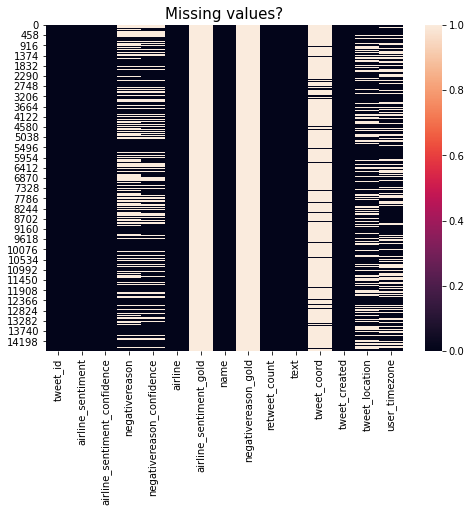

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(docData.isnull())  # Visualization of missing value using heatmap
plt.title("Missing values?", fontsize=15)
plt.show()

- Based on the above plot, we can say as these columns has almost all the values missing 'airline_sentiment_gold',    'negativereason_gold' and 'tweet_coord'.
- 'negativereason', 'negativereason_confidence', 'tweet_location' and 'user_timezone' has many values missing.

In [65]:
docData.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<IPython.core.display.Javascript object>

 #### Observation
 * airline_sentiment_gold' and 'negativereason_gold', 'tweet_coord' almost all the values missing
 * 'negativereason', 'negativereason_confidence', 'tweet_location' and 'user_timezone' has many values missing.

### Method to analyze below values 
- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [10]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)  # Nu of zero in each column
    mis_val = df.isnull().sum()  # Missing value in each column
    mis_val_percent = (
        100 * df.isnull().sum() / len(df)
    )  # Missing value percent accross column
    mz_table = pd.concat(
        [zero_val, mis_val, mis_val_percent], axis=1
    )  # Concatenation of above aoutput
    mz_table = mz_table.rename(
        columns={0: "Zero Values", 1: "Missing Values", 2: "% of Total Values"}
    )  # Renaming of each coumn
    mz_table["Total Zero Missing Values"] = (
        mz_table["Zero Values"] + mz_table["Missing Values"]
    )  # column having total of zero value and missing values
    mz_table["% Total Zero Missing Values"] = (
        100 * mz_table["Total Zero Missing Values"] / len(df)
    )  # Column having percentage of totalof zero and missing value
    mz_table["Data Type"] = df.dtypes
    mz_table = (
        mz_table[mz_table.iloc[:, 1] != 0]
        .sort_values(  # Selecting and sorting those column which have at not a zero value in % of Total Values column
            "% of Total Values", ascending=False
        )
        .round(1)
    )
    print(
        "Your selected dataframe has "
        + str(df.shape[1])
        + " columns and "
        + str(df.shape[0])
        + " Rows.\n"
        "There are " + str(mz_table.shape[0]) + " columns that have missing values."
    )
    #         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table


missing_zero_values_table(docData)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.800,14608,99.800,object
airline_sentiment_gold,0,14600,99.700,14600,99.700,object
tweet_coord,0,13621,93.000,13621,93.000,object
negativereason,0,5462,37.300,5462,37.300,object
user_timezone,0,4820,32.900,4820,32.900,object
tweet_location,0,4733,32.300,4733,32.300,object
negativereason_confidence,1344,4118,28.100,5462,37.300,float64


<IPython.core.display.Javascript object>

In [ ]:
* negativereason_gold, airline_sentiment_gold, tweet_coord column has more than  90%+ missing value.
* negativereason, user_timezone, tweet_location and negativereason_confidence column has more than 30%+
  missing values.

In [67]:
docData.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14640.000,14640.000,10522.000,14640.000
mean,569218351767382528.000,0.900,0.638,0.083
std,779111158481836.750,0.163,0.330,0.746
min,567588278875213824.000,0.335,0.000,0.000
25%,568559178101439488.000,0.692,0.361,0.000
50%,569477857923110912.000,1.000,0.671,0.000
75%,569890473289000960.000,1.000,1.000,0.000
max,570310600460525568.000,1.000,1.000,44.000


<IPython.core.display.Javascript object>

 * Descriptive statistics doesn't provide much details.

### Exploratory data analysis  

#### Reusing and customizing various methods for plotting used in case studies

In [14]:
# Number of characters in tweets
def plot_sentiment():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    tweet_len = docData[docData["airline_sentiment"] == "positive"]["text"].str.len()
    ax1.hist(tweet_len, color="green")
    ax1.set_title("Positive sentiment tweet")

    tweet_len = docData[docData["airline_sentiment"] == "neutral"]["text"].str.len()
    ax2.hist(tweet_len, color="orange")
    ax2.set_title("Neutral sentiment tweet")

    tweet_len = docData[docData["airline_sentiment"] == "negative"]["text"].str.len()
    ax3.hist(tweet_len, color="red")
    ax3.set_title("Negative sentiment tweet")
    fig.suptitle("Characters in message")

<IPython.core.display.Javascript object>

In [15]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [16]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [17]:
# function to plot word cloud

def show_wordcloud(targetdata, feature, title):
    text = " ".join(
        targetdata[feature].astype(str).tolist()
    )  # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(
        stopwords=stopwords,
        background_color="white",  # Setting the different parameter of stopwords
        colormap="viridis",
        width=800,
        height=600,
    ).generate(text)

    plt.figure(figsize=(14, 11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis("off")
    plt.title(title, fontsize=30)
    plt.show()

<IPython.core.display.Javascript object>

### Plot the distribution of sentiment across all the tweets.    

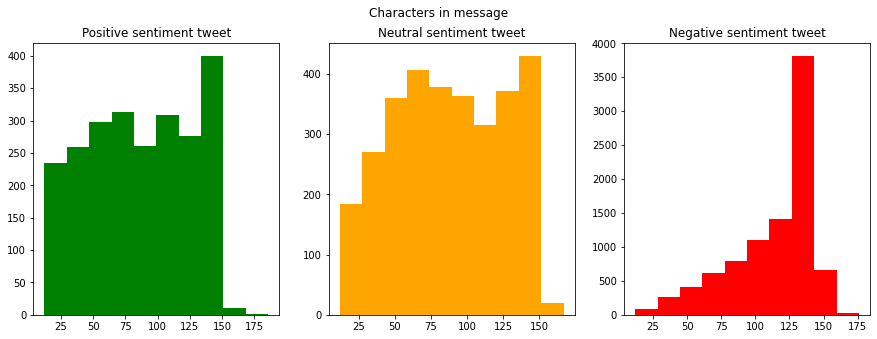

<IPython.core.display.Javascript object>

In [18]:
plot_sentiment()

**Observation**
* Distribution of positive sentiment tweets count has not much too high variation after 240.
* Distribution of Neutral sentiment tweets count has initially went up and almost remained same.
* Distribution of negative sentiment tweet count has increasing trend and it has sudden spike at 137 where
  more than 3500  people has negative  review.

### Plot the distribution of all tweets among each airline

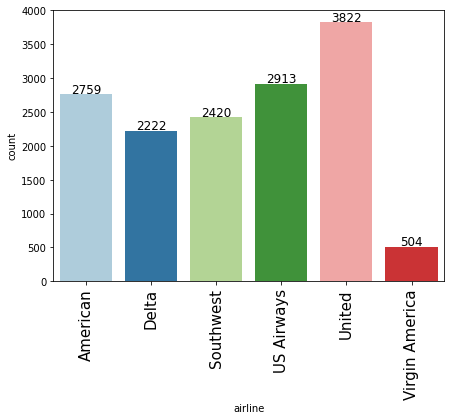

<IPython.core.display.Javascript object>

In [19]:
# observations on Airline
labeled_barplot(docData, "airline")

**Observation**
* United airline has most number of tweets.
* Virgin America has least number of tweets.

### Plot the distribution of Sentiment of tweets for each airline

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


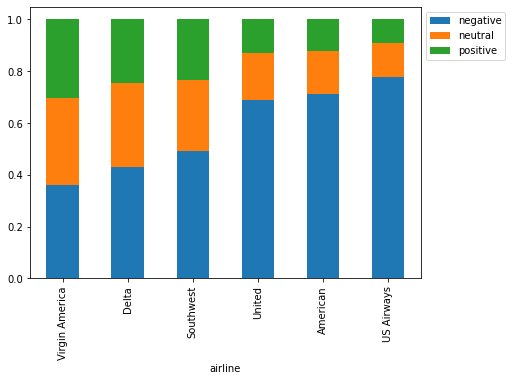

<IPython.core.display.Javascript object>

In [20]:
stacked_barplot(docData, "airline", "airline_sentiment")

**Observation**
* US Airways has  highest ratio of negatve tweets.
* United and American has almost same number ratio of positive, negative and neutral tweets.

### Plot the distribution of all the negative reasons.

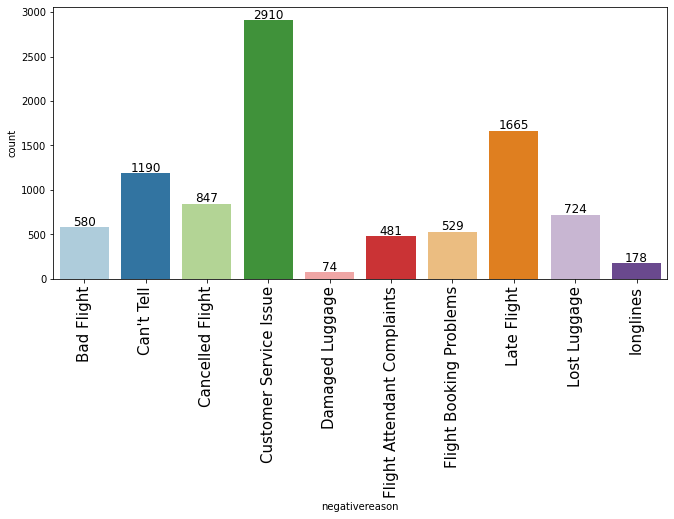

<IPython.core.display.Javascript object>

In [21]:
# Observations on negativereason
labeled_barplot(docData, "negativereason")

**Observation**
* Highest number of issues are related to customer service
* Least number of issues are related to Damaged Luggage and longiness.

### Plot the word cloud graph of tweets for positive and negative sentiment separately.

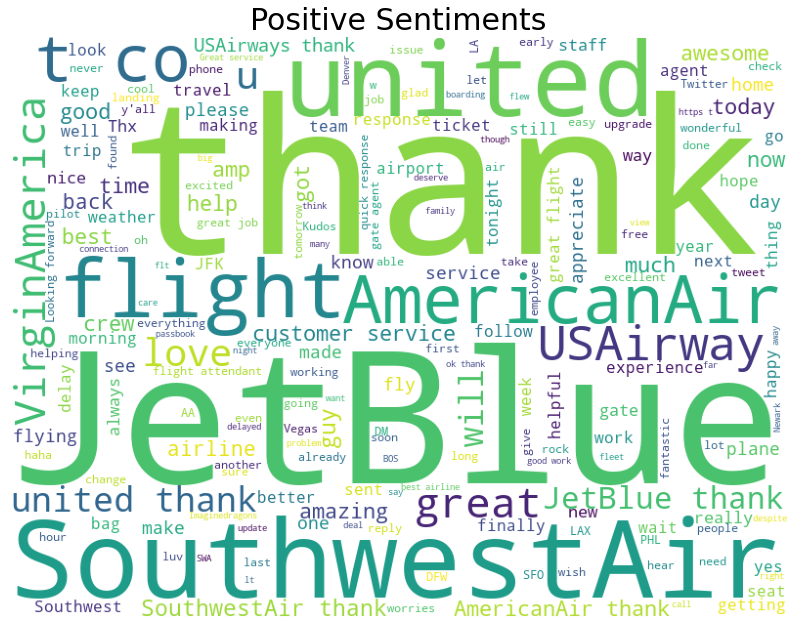

<IPython.core.display.Javascript object>

In [22]:
Positive_sentiment = docData[docData["airline_sentiment"] == "positive"]
show_wordcloud(Positive_sentiment, "text", "Positive Sentiments")

**- Word like "Thank", "JetBlue", "SouthwestAir", "flight", "united", "AmericanAir", "ViginAmerica", "USAirways" highlighted in positive sentiment tweet.**

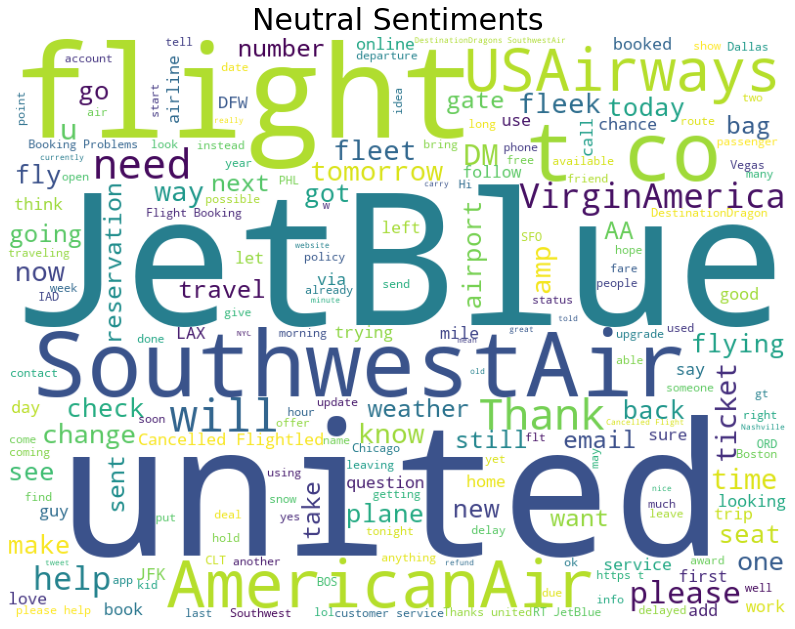

<IPython.core.display.Javascript object>

In [23]:
Neutral_sentiment = docData[docData["airline_sentiment"] == "neutral"]
show_wordcloud(Neutral_sentiment, "text", "Neutral Sentiments")

- Word like "JetBlue", "SouthwestAir", "flight", "united", "AmericanAir", "ViginAmerica", "Thank" highlighted in positive sentiment tweet.

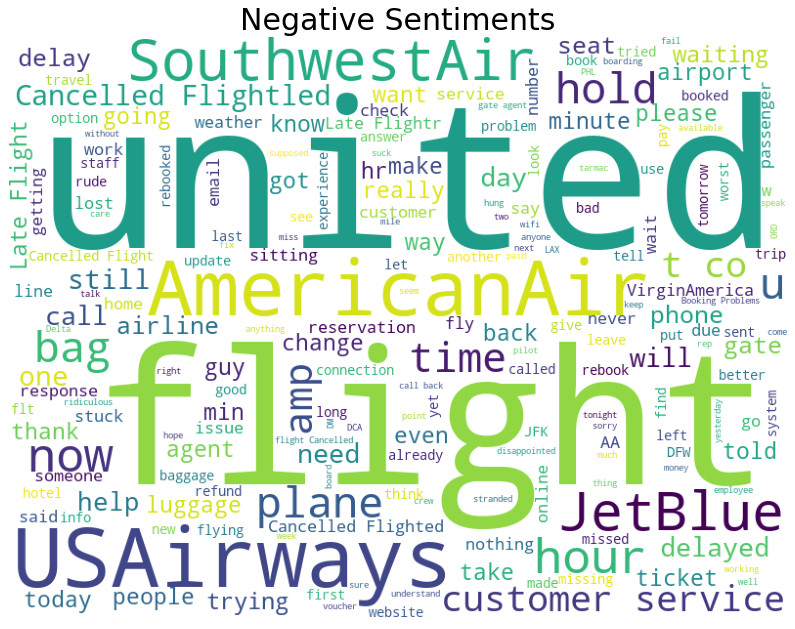

<IPython.core.display.Javascript object>

In [24]:
Negative_sentiment = docData[docData["airline_sentiment"] == "negative"]
show_wordcloud(Negative_sentiment, "text", "Negative Sentiments")

- Word like "United", "flight", "USAirways", "JetBlue", "Customer Service", "AmericanAir", "SouthWestAir" ,"Cancelled", "hold", "Flightled" highlighted in positive sentiment tweet.

#### Drop all other columns except “text” and “airline_sentiment” for model building.

In [25]:
data = docData.loc[:, ["airline_sentiment", "text"]]

<IPython.core.display.Javascript object>

In [26]:
data.shape

(14640, 2)

<IPython.core.display.Javascript object>

In [27]:
# Checking the first five rows
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


<IPython.core.display.Javascript object>

## **Text Pre-processing and Data preparation**

#### Removing the http links.

In [28]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_content = re.sub(r"http\S+", "", docData.at[i, "text"])
    data.at[i, "text"] = clean_content
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


<IPython.core.display.Javascript object>

#### Replacing the contractions.

In [29]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in data.iterrows():
    content = data.at[i, "text"]
    clean_content = replace_contractions(content)
    data.at[i, "text"] = clean_content
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


<IPython.core.display.Javascript object>

#### Removing the numbers.

In [31]:
def remove_numbers(text):
    text = re.sub(r"\d+", "", text)
    return text


data["text"] = data["text"].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


<IPython.core.display.Javascript object>

#### Removing Html tag.

In [32]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


data["text"] = data["text"].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


<IPython.core.display.Javascript object>

#### Tokenization the data

In [33]:
data["text"] = data.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


<IPython.core.display.Javascript object>

#### Removing Special Characters and Punctuations.

In [34]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r"[^\w\s]", "", word)
        if new_word != "":
            new_words.append(new_word)
    return new_words


data["text"] = data["text"].apply(lambda x: remove_punctuation(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


<IPython.core.display.Javascript object>

In [35]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = (
            unicodedata.normalize("NFKD", word)
            .encode("ascii", "ignore")
            .decode("utf-8", "ignore")
        )
        new_words.append(new_word)
    return new_words


data["text"] = data["text"].apply(lambda x: remove_non_ascii(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


<IPython.core.display.Javascript object>

#### Removing stopwords

In [36]:
stopwords = stopwords.words("english")

customlist = [
    "not",
    "can",
    "can't",
    "couldn't",
    "didn",
    "didn't",
    "doesn",
    "doesn't",
    "hadn",
    "hadn't",
    "hasn",
    "hasn't",
    "haven",
    "haven't",
    "isn",
    "isn't",
    "ma",
    "mightn",
    "mightn't",
    "mustn",
    "mustn't",
    "needn",
    "needn't",
    "shan",
    "shan't",
    "shouldn",
    "shouldn't",
    "wasn",
    "wasn't",
    "weren",
    "weren't",
    "won",
    "won't",
    "wouldn",
    "wouldn't",
]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words


data["text"] = data["text"].apply(lambda x: remove_stopwords(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, added, commercials, experience, tacky]"
2,neutral,"[VirginAmerica, I, not, today, Must, mean, I, need, take, another, trip]"
3,negative,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[VirginAmerica, really, big, bad, thing]"


<IPython.core.display.Javascript object>

#### Converting words to lowercase.

In [38]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


data["text"] = data["text"].apply(lambda x: to_lowercase(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, experience, tacky]"
2,neutral,"[virginamerica, i, not, today, must, mean, i, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


<IPython.core.display.Javascript object>

#### Lemmatizing the words

In [39]:
lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV,
    }

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_list(words):
    new_words = []
    for word in words:

        new_words.append(lemmatizer.lemmatize(word, pos="v"))
        # new_words.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
    return new_words


data["text"] = data["text"].apply(lambda x: lemmatize_list(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, add, commercials, experience, tacky]"
2,neutral,"[virginamerica, i, not, today, must, mean, i, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


<IPython.core.display.Javascript object>

#### Join the words in the list to convert back to text string in the data frame.

In [40]:
data["text"] = data.apply(lambda row: " ".join(row["text"]), axis=1)

# Displaying the first five rows
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica i not today must mean i need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


<IPython.core.display.Javascript object>

### **Building the model based on CountVectorizer and Random Forest**

In [41]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(
    max_features=2000
)  # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data["text"])

data_features = data_features.toarray()  # Convert the data features to array.


<IPython.core.display.Javascript object>

In [42]:
data_features.shape

(14640, 2000)

<IPython.core.display.Javascript object>

In [43]:
labels = data["airline_sentiment"]

<IPython.core.display.Javascript object>

In [44]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_features, labels, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [45]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7198770491803279


<IPython.core.display.Javascript object>

### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [46]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

<IPython.core.display.Javascript object>

In [47]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

<IPython.core.display.Javascript object>

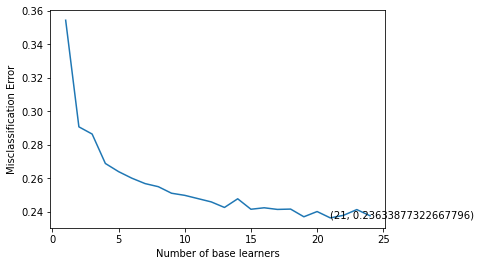

<IPython.core.display.Javascript object>

In [48]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

**Observations**
* Error lowest at  21'st base learner.
* It has score of 0.2363

In [49]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators=optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7547814207650273

<IPython.core.display.Javascript object>

In [50]:
result = clf.predict(X_test)  # saving the prediction on test data as a result

<IPython.core.display.Javascript object>

[[2446  221   74]
 [ 395  458   83]
 [ 175  129  411]]
0.7547814207650273


<AxesSubplot:>

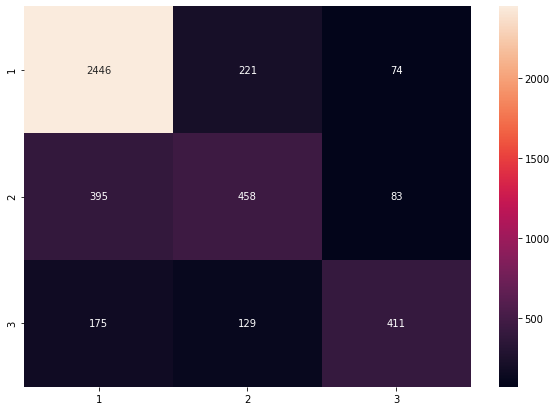

<IPython.core.display.Javascript object>

In [51]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result, average="micro"))

df_cm = pd.DataFrame(conf_mat, index=[i for i in "123"], columns=[i for i in "123"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

**Observations**
* Most of observation are correctly identified for Positive sentiments.
* Similarly neutral sentiments are correctly identified.
* But good numbers of Negative sentiments are not correctly identified.

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

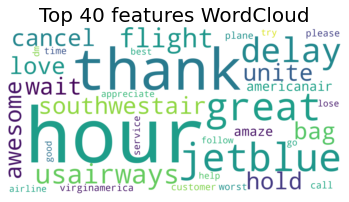

<IPython.core.display.Javascript object>

In [52]:
all_features = (
    bow_vec.get_feature_names()
)  # Instantiate the feature from the vectorizer
top_features = (
    ""  # Addition of top 40 feature into top_feature after training the model
)
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += " "


from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white", colormap="viridis", width=2000, height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(1, figsize=(14, 11), frameon="equal")
plt.title("Top 40 features WordCloud", fontsize=20)
plt.axis("off")
plt.show()

**- Word like "hour", "thank", "delay" , "great", "jetBlue", "usairways", "cancel", "awesome", "southwestair" are highlighted when model is build using CountVectorizer.**

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [53]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data["text"])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

<IPython.core.display.Javascript object>

In [54]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_features, labels, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [55]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6926229508196721


<IPython.core.display.Javascript object>

In [56]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

<IPython.core.display.Javascript object>

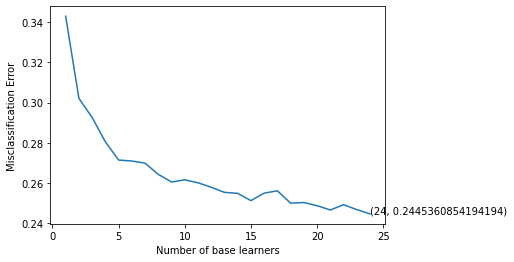

<IPython.core.display.Javascript object>

In [57]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

**Observations**
* Error lowest at  24'th base learner.
* It has score of 0.2445

In [58]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators=optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7663934426229508

<IPython.core.display.Javascript object>

In [59]:
result = clf.predict(X_test)

<IPython.core.display.Javascript object>

[[2633  137   44]
 [ 454  376   54]
 [ 233  104  357]]
0.7663934426229508


<AxesSubplot:>

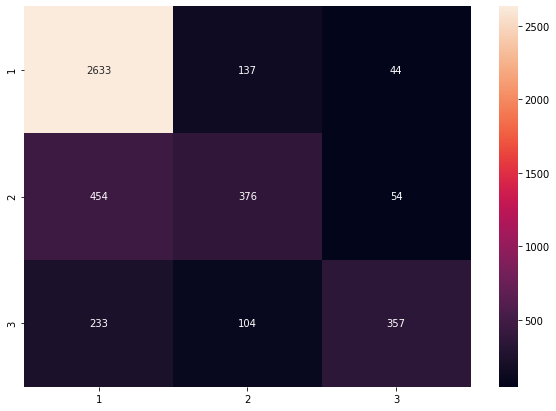

<IPython.core.display.Javascript object>

In [60]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result = clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result, average="micro"))

df_cm = pd.DataFrame(conf_mat, index=[i for i in "123"], columns=[i for i in "123"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

**Observations**
* Most of observation are correctly identified for Positive sentiments.
* Similarly neutral sentiments are correctly identified.
* But good numbers of Negative sentiments are not correctly identified but it is better than CountVectorizer model.
* Overall model build uisng TF-IDF is giving better results than model build using CountVectorizer model.

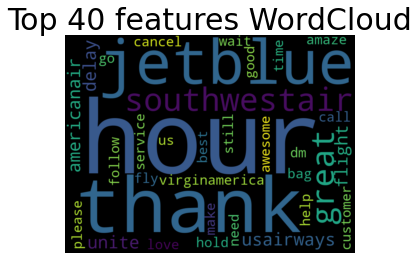

<IPython.core.display.Javascript object>

In [61]:
all_features = (
    vectorizer.get_feature_names()
)  # Instantiate the feature from the vectorizer
Top_features = (
    ""  # Addition of top 40 feature into top_feature after training the model
)
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features += all_features[i]
    Top_features += " "


from wordcloud import WordCloud

wordcloud = WordCloud(background_color="Black", width=1000, height=750).generate(
    Top_features
)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(1, figsize=(30, 30), frameon="equal")
plt.title("Top 40 features WordCloud", fontsize=30)
plt.axis("off")
plt.show()

**- Word like  "JetBlue", "hour", "thank", "great", "AmericanAir", "ViginAmerica", "southwestair" highlighted when model is build using TF-IDF.**

### **Summary**:

- We used a dataset to build **build a model for text-classification** to analyze positive, negative and neutral sentiments for each major U.S. airline.

**Below is observations** 
- Counts for negative sentiments were more than positive and neutral sentiment tweets.
- Virgin America , Southwest and delta has least number of tweets and  most of the tweets are positive and neutral. 
- US Airways has highest number of Negative tweets even though it doesn’t have highest share of tweets.
- Most of reason for negative comments are for **bad customer service**, **delayed flight**. But there is good number of comments where customer has opted **“Can’t tell”**.
- Most  common  Positive sentiments  words are **Thanks**, **JetBlue** and **SouthWest**.
- Most common Neutral sentiments  words are  **JetBlue**, **United and **Flight**.
- Most common Negative sentiments  words are  **United**, **Flight** and **USAirways**.
- Most common feature words  for model build using CountVectorizer and RandomForest are **hour**, **thank** and **great**.
- Most common feature words  for model build using TF-IDF and RandomForest are  **JetBlue**, **hour** and **thank**.
- With CountVectorizer and RandomForest  model  we achieved score of **0.2363** at **21'st** base learner.
- With TF-IDF and RandomForest  model  we achieved score of **0.2445** at **24th** base learner.
- Overall model build using TF-IDF and RandomForest  gave performance than model built using CountVectorizer and RandomForest.
- We can still increase the accuracy of our model by increasing the dataset and increasing the **max_feature parameter** in the vectorizer.
- We can also make dataset more uniforms  by including right proportion of Positive , Neutral and Negative sentiments tweets. current data set majority tweets in negative sentiments.